<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Unidad_3_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación del clasificador kNN (k-Nearest Neighbors)

## Puntos importantes
* **Tipo de Algoritmo**: KNN es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión.

* **Simpleza y Eficiencia**: KNN es conceptualmente sencillo y fácil de implementar.

* **Funcionamiento**: KNN clasifica un punto de datos en función de cómo estén clasificados sus vecinos más cercanos.

* **No Paramétrico**: Es un algoritmo no paramétrico, lo que significa que no hace suposiciones explícitas sobre la forma funcional de los datos.

* **Pesos**: Se puede asignar peso a las clasificaciones de vecinos en función de la distancia, donde los vecinos más cercanos tienen un mayor impacto en la clasificación que los más lejanos.

* **Elección de K**: El número de vecinos (K) es un parámetro crucial. Un K pequeño puede ser ruidoso y estar sujeto a sobreajuste, mientras que un K grande puede suavizar demasiado la clasificación.

* **Distancias**: Es sensible a la métrica de distancia utilizada, comúnmente se usa la distancia euclidiana.

* **Normalización**: Dado que KNN se basa en la distancia entre los puntos, es importante normalizar o estandarizar los datos, especialmente si las características tienen diferentes escalas.

* **Pereza**: KNN es un algoritmo "perezoso" porque no utiliza los datos de entrenamiento para hacer una generalización. En su lugar, almacena todo el conjunto de entrenamiento.

* **Costo Computacional**: La clasificación puede ser costosa computacionalmente cuando el conjunto de datos es grande, ya que compara un punto de datos con todos los demás en el conjunto de datos.

* **Problemas con Dimensiones Altas**: KNN puede no ser adecuado para conjuntos de datos con muchas dimensiones (maldición de la dimensionalidad). En tales casos, la distancia entre muestras puede no ser informativa.

* Sensibilidad a Ruido: Es sensible a puntos de datos ruidosos o irrelevantes, ya que el ruido puede alterar la distancia entre los puntos.

## Ejemplo kNN básico
A continuación se desarrolla la implementación de un un caso sencillo y básico de kNN con datos fictíceos.

### Importación de las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

### Generación de los datos
* Generamos un conjunto de datos usando 'make_moons'
* Esta función genera un conjunto de datos en forma de dos medias lunas entrelazadas.

In [ ]:
X, y = make_moons(50, noise=0.1)

### Creación y Entrenamiento del modelo kNN
* Aquí definimos el número de vecinos a considerar. El valor k = 5 es comúnmente usado, pero cada caso práctico es único y se debe testear mediante las métricas hasta dar con el mejor valor para k.


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier()

### Evaluación del modelo
En comparación con SVM, no hay un "hiperplano" claro en KNN. En lugar de eso, la decisión se toma en función de la mayoría de clases de los 'k' vecinos más cercanos.

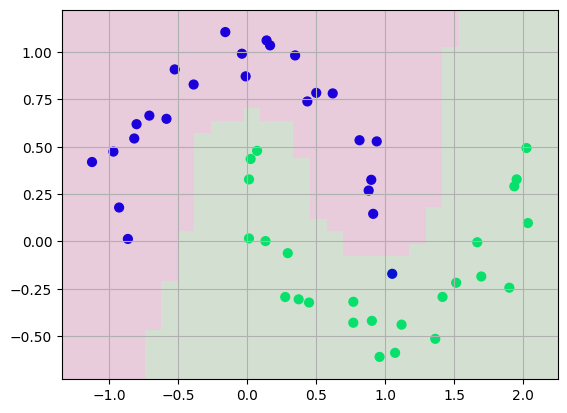

In [ ]:
# Establece el mapa de colores
cmap = plt.cm.bwr

# Establece el mapa de colores que usaremos para representar las dos clases.
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter')

# Crea una cuadrícula de valores para evaluar el modelo
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predice las clases para cada punto en la cuadrícula
Z_pred = clf.predict(xy)
Z_pred = Z_pred.reshape(XX.shape)

# Representación de las áreas de decisión
cmap_area = plt.cm.PiYG
plt.pcolormesh(XX, YY, Z_pred, cmap=cmap_area, alpha=0.2)

plt.grid()
plt.show()

## Ejemplo con caso particular

### Importación de Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

### Generación de datos

In [ ]:
X, y = make_moons(50, noise=0.1)

### Creación y Entrenamiento del modelo kNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier()

### Evaluación del modelo

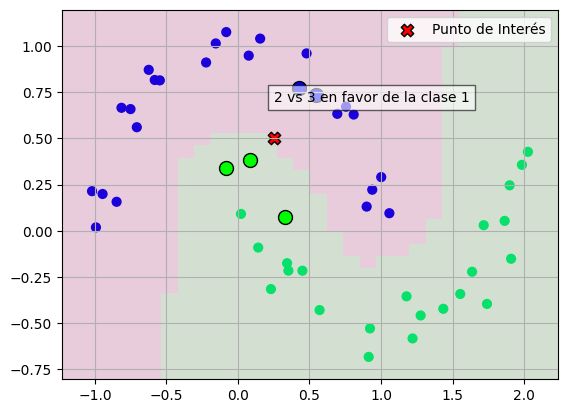

In [ ]:
# Establece el mapa de colores
cmap = plt.cm.bwr

# Establece el mapa de colores que usaremos para representar las dos clases.
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter')

# Crea una cuadrícula de valores para evaluar el modelo
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predice las clases para cada punto en la cuadrícula
Z_pred = clf.predict(xy)
Z_pred = Z_pred.reshape(XX.shape)

# Representación de las áreas de decisión
cmap_area = plt.cm.PiYG
plt.pcolormesh(XX, YY, Z_pred, cmap=cmap_area, alpha=0.2)

# Supongamos que queremos visualizar los vecinos más cercanos para un punto específico
sample_point = np.array([[0.25, 0.5]])

# Usamos el método kneighbors para obtener los índices de los vecinos más cercanos
distances, indices = clf.kneighbors(sample_point)

# Extraemos las coordenadas y clases de los vecinos más cercanos
neighbors = X[indices]
neighbor_classes = y[indices]

# Dibuja los vecinos más cercanos, coloreando según su clase
for i, (x, y) in enumerate(neighbors[0]):
    color = 'blue' if neighbor_classes[0][i] == 0 else 'lime'
    plt.scatter(x, y, color=color, edgecolors='black', s=100)

# Dibuja el punto específico para el cual queremos ver los vecinos
plt.scatter(sample_point[:, 0], sample_point[:, 1], color='red', edgecolors='black', s=80, marker='X', label='Punto de Interés')

# Calcula cuántos vecinos de cada clase están alrededor
votes_class_blue = sum(neighbor_classes[0] == 0)
votes_class_green = sum(neighbor_classes[0] == 1)

# Muestra un contador de votos cerca del punto de interés
text = f"{votes_class_blue} vs {votes_class_green} en favor de la clase {clf.predict(sample_point)[0]}"
plt.text(sample_point[0, 0], sample_point[0, 1] + 0.2, text, bbox=dict(facecolor='white', alpha=0.6))

plt.grid()
plt.legend()  # Para mostrar la leyenda
plt.show()


## WIP - Caso real (Clasificacion de imagenes)